<a href="https://colab.research.google.com/github/ShiqingZhang11/COVID-19-Tweets-Sentiment-Analysis/blob/main/7_3_Encoder_Decoder_Models_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Shivanandroy/T5-Finetuning-PyTorch/blob/main/notebook/T5_Fine_tuning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
- 1. [Project Purpose](#toc1_)    
- 2. [Library Initialization](#toc2_)    
- 3. [LLMs Loading](#toc3_)    
- 4. [Item List Loading](#toc4_)    
- 5. [Reformulation of the Question](#toc5_)    
- 6. [Likert Scale](#toc6_)    
- 7. [Test](#toc7_)
  - 7.0 [Machine Learning & Deep Learning Models - BASELINE](#toc7_0_)
  - 7.1 [Decoder-Only Models](#toc7_1_)
  - 7.2 [Encoder-Only Models](#toc7_2_)
  - 7.3 [Encoder-Decoder Models](#toc7_3_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=7
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. [Project purpose](#toc1_)

Individuals with schizophrenia face a 15-20 year reduction in life expectancy and recovery rates as low as 13.5%, underscoring the urgent need for better care standards. The ambition of PRIME-AI (Person-Reported Insights and Measures Enhanced by AI) is to radically transform the care of individuals with schizophrenia by focusing on their experiences as people, not just as diagnoses and patients.

By integrating Artificial Intelligence (AI) with established psychometric methods, we aim to set a new standard in evaluating health-related quality of life (HRQoL), a patient-reported outcome typically measured through questionnaires. PRIME-AI combines Computerized Adaptive Testing (CAT) based on Item Response Theory (IRT) with advanced Natural Language Processing (NLP) technologies, optimizing the strengths of both methodologies. CAT-IRT offers precision in selecting the most relevant questions based on individual responses and provides valid scores through a unique metric. The NLP technologies, which may include large language models, rule-based systems, machine learning, and hybrid methods, enhance the ability to capture and analyze complex patient qualitative data. NLP approaches, including the use of conversational agents, enhance engagement by adapting and reformulating questions for better comprehension, particularly for individuals with cognitive impairments. NLP enables the synthesis of rich qualitative insights, providing a deeper understanding of individual answers.

The groundbreaking integration of CAT-IRT and AI enables a comprehensive analysis of HRQoL by combining, for the first time, scientifically rigorous quantitative measures with deeply personalized qualitative insights crucial for clinical decision-making. PRIME-AI represents a major advancement in addressing the needs of these extremely vulnerable and neglected individuals. This inclusive approach is key to enhancing the quality and personalization of care, ultimately facilitating successful recovery.

![](interaction_project_dag.png)

This notebook will focus on the conversion of natural language sentences from patients to a Likert Scale operable for the IRT algorithm.

# 2. [Library Initialization](#toc2_)

In [ ]:
# pip install ollama langchain_community langchain_core pydantic pandas

# 3. [LLMs loading](#toc3_)

We use `ollama` and `langchain` frameworks to interract with LLM.

Use the following command to initiate `ollama` :


<p style="color:red;">ollama serve</p>


Download a model to use :


<p style="color:red;">ollama run mistral</p>


Use model with langchain API.

# 4. [Item List Loading](#toc4_)

The file `liste item avec reformulations.xlsx` contains all the items from the different questionaires. Just modify the `sheet_name` to change questionaire.

In [ ]:
import sys
sys.executable

'/mnt/c/Users/Shiqi/Desktop/APHM/env001/bin/python'

In [ ]:
%%time
import pandas as pd
import io
from tkinter import Tk, filedialog
root = Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Select an Excel file", filetypes=[("Excel files", "*.xlsx *.xls")])
item_bank = pd.read_excel(file_path, header=0).dropna()
item_bank

CPU times: user 839 ms, sys: 322 ms, total: 1.16 s
Wall time: 8.83 s


,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0
...,...,...,...,...,...,...
5995,46,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Oui, à chaque consultation, mes opinions étaie...",2
5996,47,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Non, je me suis souvent senti(e) exclu(e) des ...",0
5997,48,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Globalement, je pense que mes opinions étaient...",1
5998,49,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Oui, mes opinions étaient toujours écoutées et...",2


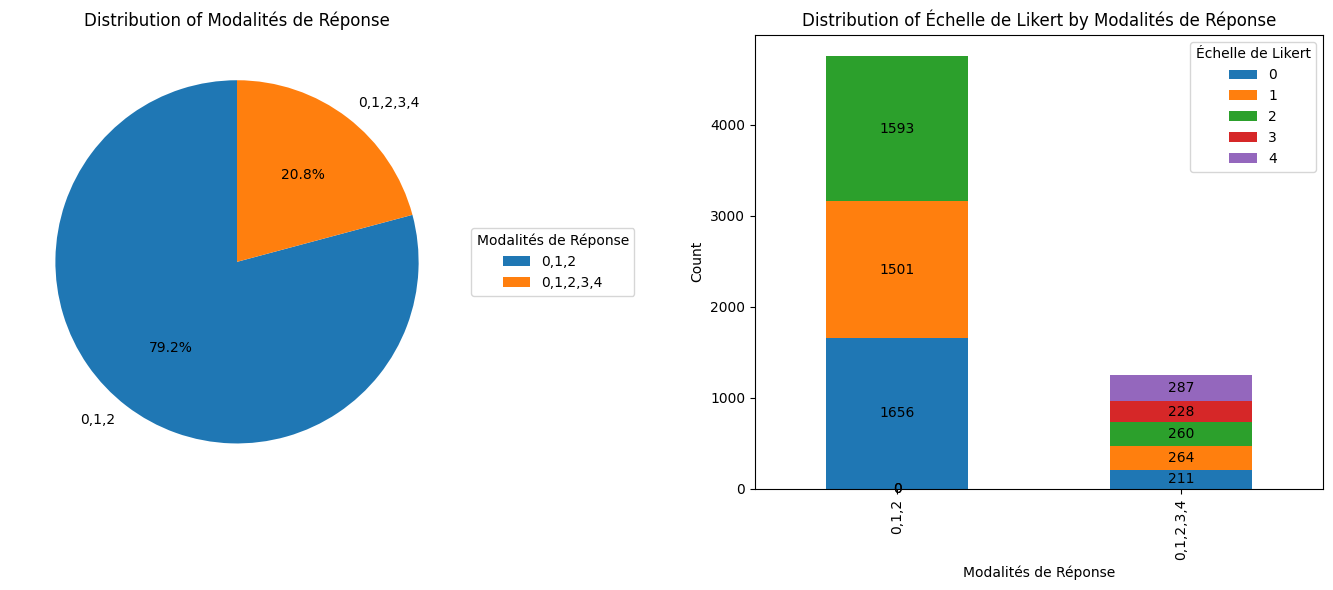

In [ ]:
import matplotlib.pyplot as plt

value_counts = item_bank['modalités de réponse'].value_counts()
distribution = pd.crosstab(item_bank['modalités de réponse'], item_bank['échelle de Likert'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Modalités de Réponse')
ax1.legend(value_counts.index, title="Modalités de Réponse", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax2 = distribution.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Distribution of Échelle de Likert by Modalités de Réponse')
ax2.set_xlabel('Modalités de Réponse')
ax2.set_ylabel('Count')
ax2.legend(title='Échelle de Likert')

for container in ax2.containers:
    ax2.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

# 5. [Reformulation of the question](#toc5_)

If the patient didn't great understand the question, we need to rephrase it.

We choose a LLM Few-Shot Learning approach for this task. For each item, we used a big model language (ChatGPT-4o) for generating a dozen of possible reformulation.
After a phase of prompt engenering, we have succeeded to the following code.

Just modify the `num` variable to select an item in the choosen questionaire.

In [ ]:
%%time
from pydantic import BaseModel, ValidationError, conint
from langchain_ollama import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Item number - You can modify it
num = 20

item = item_bank["libellé"].iloc[num]
# reformulation = item_bank["reformulations"].iloc[num]
reformulation = item_bank["réponse"].iloc[num]
item_response_group = item_bank["modalités de réponse"].iloc[num]
prompt = ChatPromptTemplate.from_messages([
    ("system", "Tu es un médecin en psychiatrie qui fait passer un questionnaire de satisfaction à un patient qui vient d'être hospitalisé dans ton service."),
    ("system", "Tes réponses seront exclusivement en Français en style décontracté."),
    ("system", "Reformule cette question pour qu'elle soit plus compréhensible pour le patient. Assure-toi d'utiliser des mots simples et un langage clair."),
    ("system", f"Voila des exemples de phrases dont tu peux t'inspirer pour la reformulation : {reformulation}."),
    ("system", "Utilise le vouvoiement dans tes réponses. Vouvoie le patient."),
    ("system", "Répond avec une phrase en Français et rien d'autre, pas d'explication."),
    ("user", "Voila la question que le patient ne comprend pas bien : {input}")
])

output_parser = StrOutputParser()

chain = prompt | OllamaLLM(model="phi3.5", temperature=0.0) | output_parser

answer = chain.invoke({"input", item})
answer = answer.strip()
print(f"Original question : {item}")
print(f"Groupe de réponse attendu : {item_response_group}")
print(f"Reformulation de la question : {answer}")

Original question : Avez-vous trouvé que vous avez pu facilement contacter un professionnel de santé lorsque vous en avez ressenti(e) le besoin ?
Groupe de réponse attendu : 0,1,2
Reformulation de la question : Pouviez-vous dire si il était simple pour vous d'avoir accès à une aide médicale quand cela fallait vraiment l'aider?
CPU times: user 210 ms, sys: 15.3 ms, total: 226 ms
Wall time: 1.65 s


# 6. [Likert Scale](#toc6_)

LLM generating Likert Scale.

Please note that the range of Likert score vary by items. This range is given by the `item_response_group` variable.

In [ ]:
%%time
if item_response_group == "0,1,2":

	prompt = ChatPromptTemplate.from_messages([
		("system", f"Nous posons dans le cadre d'une évaluation de la qualité des soins la question suivante à un patient sortant d'une hospitalisation en service de psychiatrie : {item}."),
		("system", "En utilisant la réponse suivante, classe la sur une échelle de Likert de 0 à 2 avec 0=pas d'accord, 1= ni d'accord ni pas d'accord, 2=d'accord:"),
		("system", "Répond avec seulement un chiffre entre 0 à 2 sans commentaire ni explication."),
		("system", "Voici quelques exemples de réponse attendue : 1. 2. 0."),
		("system", "Si le patient ne répond pas à la question, la réponse est N"),
		("system", "Je veux que tu donnes à la suite de ta réponse une explication en Français uniquement."),
		("system", "Donne moi en pourcentage la confiance que tu a en ta réponse."),
		("user", "{input}")
	])

elif item_response_group == "0,1,2,3,4":
    prompt = ChatPromptTemplate.from_messages([
		("system", f"Nous posons dans le cadre d'une évaluation de la qualité des soins la question suivante à un patient sortant d'une hospitalisation en service de psychiatrie : {item}."),
		("system", "En utilisant la réponse suivante, classe la sur une échelle de Likert de 0 à 4 avec 0=pas du tout d'accord, 1=pas d'accord, 2=ni d'accord ni pas d'accord, 3=d'accord, 4=tout à fait d'accord"),
		("system", "Répond avec seulement un chiffre entre 0 à 4 sans commentaire ni explication."),
		("system", "Voici quelques exemples de réponse attendue : 1. 2. 0. 3. 4."),
		("system", "Si le patient ne répond pas à la question, la réponse est N"),
		("system", "Je veux que tu donnes à la suite de ta réponse une explication en Français uniquement."),
		("system", "Donne moi en pourcentage la confiance que tu a en ta réponse."),
		("user", "{input}")
	])

output_parser = StrOutputParser()

chain = prompt | OllamaLLM(model="phi3.5", temperature=0.0) | output_parser

answer = chain.invoke({"input":"ouais ça va c'est pas trop mal"})
likert_score = answer.strip()[0]
print(f"Likert score : {likert_score}")
print(answer)
class LikertResponse(BaseModel):
    score: conint(ge=0, le=4)

# Validation avec Pydantic
try:
    validated_response = LikertResponse(score=int(likert_score))
    print(f"Validated Likert Score: {validated_response.score}")
except ValidationError as e:
    print(f"Validation Error: {e}")

Likert score : 1
1 (Cela indique un certain niveau d'accord, bien qu'il puisse y avoir des améliorations).  
Pourcentage de confiance : 70%  
Explication en Français: Le patient exprime une certaine satisfaction avec le système actuel tout en reconnaissant que les choses pourraient être encore meilleures. Cela suggère un niveau modéré d'accord, ce qui justifie la note '1'. Cependant, étant donné qu'ils ne sont pas totalement satisfaits et voient des possibilités de progrès, leur confiance dans cette réponse est légèrement inférieure à 100%, soit environ 70%.
Validated Likert Score: 1
CPU times: user 86.5 ms, sys: 0 ns, total: 86.5 ms
Wall time: 2.18 s


A faire :

- Génération données synthétiques sur l'échelle de Likert
- Génration données synthétiques sur les items
- Utilisation de parser Pydantic pour formatter la sortie des LLM. [Structurer la sortie des LLM](https://simmering.dev/blog/structured_output/)
  - [Llama index](https://docs.llamaindex.ai/en/stable/examples/output_parsing/llm_program/)
  - [Langchain](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/types/pydantic/)

# 7. [Test](#toc7_)

## 7.3 [Encoder-Decoder Models](#toc7_3_)
<div style="background-color: lightSkyBlue; width: 100%; height: 50px; padding: 30px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 30px; font-weight: bold;">
    Encoder-Decoder Models
  </p>
</div>

In [ ]:
import os
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    FlaubertTokenizer, FlaubertForSequenceClassification,
    CamembertTokenizer, CamembertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification,
    T5Tokenizer, T5ForConditionalGeneration,
    BartTokenizer, BartForConditionalGeneration,
    MBartTokenizer, MBartForConditionalGeneration
)

# Directory to store downloaded models
download_dir = "./Downloaded_Models"
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

models = [
    # T5 small model
    ("t5-small", T5Tokenizer, T5ForConditionalGeneration, f"{download_dir}/local_t5_small_tokenizer", f"{download_dir}/local_t5_small_model"),

    # T5 base model
    ("t5-base", T5Tokenizer, T5ForConditionalGeneration, f"{download_dir}/local_t5_base_tokenizer", f"{download_dir}/local_t5_base_model"),

    # BART model
    ("facebook/bart-base", BartTokenizer, BartForConditionalGeneration, f"{download_dir}/local_bart_tokenizer", f"{download_dir}/local_bart_model"),

    # mBART model
    ("facebook/mbart-large-50", MBartTokenizer, MBartForConditionalGeneration, f"{download_dir}/local_mbart_tokenizer", f"{download_dir}/local_mbart_model"),

    # French T5 model
    ("plguillou/t5-base-fr-sum-cnndm", T5Tokenizer, T5ForConditionalGeneration, f"{download_dir}/local_french_t5_tokenizer", f"{download_dir}/local_french_t5_model"),

    # French BART model (multilingual, includes French)
    ("facebook/mbart-large-50-many-to-many-mmt", MBartTokenizer, MBartForConditionalGeneration, f"{download_dir}/local_french_bart_tokenizer", f"{download_dir}/local_french_bart_model")
]

# Iterate through the list of models and download them
for model_name, tokenizer_class, model_class, tokenizer_path, model_path in models:
    print(f"Downloading {model_name}...")

    # Ensure tokenizer and model are loaded correctly
    try:
        tokenizer = tokenizer_class.from_pretrained(model_name)
        model = model_class.from_pretrained(model_name)

        # Save tokenizer and model locally
        tokenizer.save_pretrained(tokenizer_path)
        model.save_pretrained(model_path)

        print(f"{model_name} has been saved locally at {tokenizer_path} and {model_path}")

    except Exception as e:
        print(f"Error downloading {model_name}: {e}")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


t5-small has been saved locally at ./Downloaded_Models/local_t5_small_tokenizer and ./Downloaded_Models/local_t5_small_model
t5-base has been saved locally at ./Downloaded_Models/local_t5_base_tokenizer and ./Downloaded_Models/local_t5_base_model


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


facebook/bart-base has been saved locally at ./Downloaded_Models/local_bart_tokenizer and ./Downloaded_Models/local_bart_model
facebook/mbart-large-50 has been saved locally at ./Downloaded_Models/local_mbart_tokenizer and ./Downloaded_Models/local_mbart_model


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


plguillou/t5-base-fr-sum-cnndm has been saved locally at ./Downloaded_Models/local_french_t5_tokenizer and ./Downloaded_Models/local_french_t5_model
facebook/mbart-large-50-many-to-many-mmt has been saved locally at ./Downloaded_Models/local_french_bart_tokenizer and ./Downloaded_Models/local_french_bart_model


In [ ]:
import torch
if torch.cuda.is_available():
    print("CUDA Available:", torch.cuda.is_available())
    num_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices visible: {num_devices}")
    gpu_id = torch.cuda.current_device()
    print("GPU ID:", gpu_id)
    for i in range(num_devices):
        print(f"CUDA Device {i} Name: {torch.cuda.get_device_name(i)}")
    total_memory = torch.cuda.get_device_properties(gpu_id).total_memory
    reserved_memory = torch.cuda.memory_reserved(gpu_id)
    allocated_memory = torch.cuda.memory_allocated(gpu_id)
    free_memory = reserved_memory - allocated_memory

    print(f"Total memory: {total_memory / (1024**3):.2f} GB")
    print(f"Reserved memory: {reserved_memory / (1024**3):.2f} GB")
    print(f"Allocated memory: {allocated_memory / (1024**3):.2f} GB")
    print(f"Free memory: {free_memory / (1024**3):.2f} GB")
else:
    logger.info("No CUDA-enabled device found.")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import torch
import gc

# Check initial memory usage
if torch.cuda.is_available():
    print(f"Initial memory reserved: {torch.cuda.memory_reserved() / (1024**3):.2f} GB")
    print(f"Initial memory allocated: {torch.cuda.memory_allocated() / (1024**3):.2f} GB")

# # Delete unnecessary variables if there are any
# del variable_name  # Replace variable_name with actual variable names, if any

# Manually run garbage collection
gc.collect()

# Clear cached memory
torch.cuda.empty_cache()

# Check memory usage after clearing cache
if torch.cuda.is_available():
    print(f"After clearing cache memory reserved: {torch.cuda.memory_reserved() / (1024**3):.2f} GB")
    print(f"After clearing cache memory allocated: {torch.cuda.memory_allocated() / (1024**3):.2f} GB")

CUDA Available: True
Number of CUDA devices visible: 1
GPU ID: 0
CUDA Device 0 Name: NVIDIA GeForce RTX 4080 Laptop GPU
Total memory: 11.99 GB
Reserved memory: 0.82 GB
Allocated memory: 0.69 GB
Free memory: 0.12 GB
Using device: cuda
Initial memory reserved: 0.82 GB
Initial memory allocated: 0.69 GB
After clearing cache memory reserved: 0.82 GB
After clearing cache memory allocated: 0.69 GB


In [ ]:
from transformers import pipeline

# Define the zero-shot classification pipeline
classifier = pipeline(
    task="zero-shot-classification",
    device=0,
    model="facebook/bart-large-mnli"
)

# Define the text and the new labels
text = "Oui, tout était bien organisé, avec une séparation judicieuse entre les espaces de travail et de détente."
labels = ["strong negative", "negative", "neutral", "postive", "strong postive"]

# Classify the text using the new labels
result = classifier(text, labels, multi_label=False)

# Find the label with the highest score
highest_score_index = result['scores'].index(max(result['scores']))
best_label = result['labels'][highest_score_index]

# Display the result
print(result)
print(f"Predicted label: {best_label} with score: {result['scores'][highest_score_index]}")

{'sequence': 'Oui, tout était bien organisé, avec une séparation judicieuse entre les espaces de travail et de détente.', 'labels': ['postive', 'strong postive', 'neutral', 'negative', 'strong negative'], 'scores': [0.5249003767967224, 0.4519050121307373, 0.01705465465784073, 0.0034005900379270315, 0.0027394078206270933]}
Predicted label: postive with score: 0.5249003767967224


In [ ]:
classifier = pipeline("text-classification",device=0)
# classifier = pipeline("sentiment-analysis",device=0)
result_1 = classifier("je ne veux pas travailler aujourd'hui!")
print(result_1)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9955005049705505}]


### 7.3.1 [BART - Zero-Shot Classification](#toc7_3_1_)
<div style="background-color: lightskyblue; width: 100%; height: 30px; padding: 10px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 20px; font-weight:bold;">
    BART - Zero-Shot Classification
  </p>
</div>

In [ ]:
%%time
import os
import pandas as pd
from transformers import pipeline

# Define the zero-shot classification pipeline
classifier = pipeline(
    task="zero-shot-classification",
    device=0,  # Use GPU if available
    model="facebook/bart-large-mnli"
)

# Function to get the appropriate labels based on 'modalités de réponse'
def get_labels(modalites_de_reponse):
    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"]
    else:
        return ["negative", "neutral", "positive"]  # Default if no match

# Function to map labels to integers for the BART_predict column
def map_label_to_int(modalites_de_reponse, label):
    if modalites_de_reponse == "0,1,2":
        label_map = {"negative": 0, "neutral": 1, "positive": 2}
    elif modalites_de_reponse == "0,1,2,3,4":
        label_map = {"strong negative": 0, "negative": 1, "neutral": 2, "positive": 3, "strong positive": 4}
    else:
        label_map = {"negative": 0, "neutral": 1, "positive": 2}  # Default map if no match
    return label_map.get(label, -1)  # Return -1 if no valid mapping is found

# Function to classify each response, select the label with the highest score, and map to integer
def classify_response(row):
    labels = get_labels(row['modalités de réponse'])  # Get labels based on 'modalités de réponse'
    result = classifier(row['réponse'], labels, multi_label=True)  # Use multi_label=True
    highest_score_index = result['scores'].index(max(result['scores']))  # Select the highest score
    best_label = result['labels'][highest_score_index]

    # Map the best label to an integer for BART_predict column
    mapped_int = map_label_to_int(row['modalités de réponse'], best_label)
    return pd.Series([best_label, mapped_int])

# Function to calculate accuracy
def compute_accuracy(df):
    correct_predictions = (df['BART_predict'] == df['échelle de Likert']).sum()
    total_predictions = len(df)
    return (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0

# Set batch size
batch_size = 200  # Adjust based on memory capacity

# Initialize empty lists to hold batch results
predict_label_list = []
bart_predict_list = []
overall_correct_predictions = 0
overall_total_predictions = 0

# Process the data in batches
num_batches = len(item_bank) // batch_size + (1 if len(item_bank) % batch_size != 0 else 0)

for batch_num in range(num_batches):
    start_idx = batch_num * batch_size
    end_idx = min(start_idx + batch_size, len(item_bank))

    print(f"Processing Batch {batch_num + 1} / {num_batches}...")

    # Proess the current batch
    batch_data = item_bank.iloc[start_idx:end_idx].copy()  # Copy the batch data to avoid modifying slices
    batch_results = batch_data.apply(classify_response, axis=1)

    # Append batch results to the lists
    predict_label_list.extend(batch_results[0])
    bart_predict_list.extend(batch_results[1])

    # Compute batch accuracy
    batch_data['BART_predict'] = batch_results[1]
    batch_accuracy = compute_accuracy(batch_data)
    print(f"Batch {batch_num + 1}'s accuracy is {batch_accuracy:.2f}%")

    # Update overall correct predictions and total predictions
    overall_correct_predictions += (batch_data['BART_predict'] == batch_data['échelle de Likert']).sum()
    overall_total_predictions += (end_idx - start_idx)

    # Print running overall accuracy
    overall_accuracy = (overall_correct_predictions / overall_total_predictions) * 100 if overall_total_predictions > 0 else 0
    print(f"Overall accuracy so far is {overall_accuracy:.2f}%")

# After processing all batches, update the original DataFrame
item_bank['predict_label'] = predict_label_list
item_bank['BART_predict'] = bart_predict_list

# Save the results to an Excel file
output_file = os.path.join('Outputs', 'Predicted_Results', 'BART_zeroshot_classification.xlsx')
item_bank.to_excel(output_file, index=False)

from IPython.display import display
display(item_bank)

Processing Batch 1 / 30...
Batch 1's accuracy is 64.50%
Overall accuracy so far is 64.50%
Processing Batch 2 / 30...
Batch 2's accuracy is 58.50%
Overall accuracy so far is 61.50%
Processing Batch 3 / 30...
Batch 3's accuracy is 63.00%
Overall accuracy so far is 62.00%
Processing Batch 4 / 30...
Batch 4's accuracy is 68.00%
Overall accuracy so far is 63.50%
Processing Batch 5 / 30...
Batch 5's accuracy is 65.50%
Overall accuracy so far is 63.90%
Processing Batch 6 / 30...
Batch 6's accuracy is 53.00%
Overall accuracy so far is 62.08%
Processing Batch 7 / 30...
Batch 7's accuracy is 29.50%
Overall accuracy so far is 57.43%
Processing Batch 8 / 30...
Batch 8's accuracy is 31.00%
Overall accuracy so far is 54.12%
Processing Batch 9 / 30...
Batch 9's accuracy is 54.00%
Overall accuracy so far is 54.11%
Processing Batch 10 / 30...
Batch 10's accuracy is 58.50%
Overall accuracy so far is 54.55%
Processing Batch 11 / 30...
Batch 11's accuracy is 61.00%
Overall accuracy so far is 55.14%
Proces

,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,predict_label,BART_predict
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2,negative,0
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0,negative,0
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1,negative,0
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2,positive,2
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0,negative,0
...,...,...,...,...,...,...,...,...
5995,46,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Oui, à chaque consultation, mes opinions étaie...",2,positive,2
5996,47,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Non, je me suis souvent senti(e) exclu(e) des ...",0,negative,0
5997,48,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Globalement, je pense que mes opinions étaient...",1,negative,0
5998,49,RD16,"0,1,2",Avez-vous trouvé que vos opinions ont été pris...,"Oui, mes opinions étaient toujours écoutées et...",2,positive,2


CPU times: user 5min 37s, sys: 41 s, total: 6min 18s
Wall time: 6min 18s


### 7.3.2 [BART - Fine-Tuning & Prompt Engineering](#toc7_3_2_)
<div style="background-color: lightskyblue; width: 100%; height: 30px; padding: 10px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 20px; font-weight:bold;">
    BART - Fine-Tuning & Prompt Engineering
  </p>
</div>

In [ ]:
%%time
import os
import pandas as pd
from transformers import BartTokenizer, BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import EarlyStoppingCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split
import torch
import logging

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_dir = os.getcwd()
predicted_results_dir = os.path.join(log_dir, "Outputs/Predicted_Results")
os.makedirs(predicted_results_dir, exist_ok=True)

# Logging Setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Load BART Model and Tokenizer
# -----------------------------------
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large").to(device)

# -----------------------------------
# 3. Mapping Likert Values to Labels
# -----------------------------------
def map_likert_to_labels(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']

    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Load the dataset (item_bank)
df = item_bank.head(100)[['libellé', 'réponse', 'échelle de Likert', 'modalités de réponse']]

# Apply the Likert value-to-label mapping
df['label'] = df.apply(map_likert_to_labels, axis=1)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# Convert the data into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# -----------------------------------
# 4. Fine-tuning BART Model with Explicit Constraints
# -----------------------------------
def tokenize_function(examples):
    inputs = ["Question: " + q + " Response: " + r for q, r in zip(examples['libellé'], examples['réponse'])]
    outputs = [str(label) for label in examples['label']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(outputs, max_length=2, truncation=True, padding="max_length").input_ids
    model_inputs['labels'] = labels
    return model_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for Trainer to understand the labels
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])

# Fine-tuning BART with Early Stopping and Learning Rate Scheduler
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    load_best_model_at_end=True,
    save_total_limit=2,
    save_strategy="epoch",
    metric_for_best_model="eval_loss"
)

trainer = Seq2SeqTrainer(
    model=bart_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train the model
trainer.train()

# Save the fine-tuned model
bart_model.save_pretrained("./fine_tuned_bart_likert")
tokenizer.save_pretrained("./fine_tuned_bart_likert")

# -----------------------------------
# 5. Predicting Sentiment with Constrained Labels Using BART
# -----------------------------------
from difflib import get_close_matches
def generate_sentiment(input_text, modalites_de_reponse):
    if modalites_de_reponse == "0,1,2":
        possible_labels = ["negative", "neutral", "positive"]
    elif modalites_de_reponse == "0,1,2,3,4":
        possible_labels = ["strong negative", "negative", "neutral", "positive", "strong positive"]

    # Create the prompt
    prompt = f"Given the response: '{input_text}', predict the sentiment from {possible_labels}."

    # Tokenize the input
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # Generate the output (sentiment label)
    outputs = bart_model.generate(**inputs, max_length=10, num_beams=5, early_stopping=True)

    # Decode the output and extract the generated sentiment
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True).strip().lower()

    # Try to match the generated sentiment with one of the possible labels (using close matching)
    matched_label = get_close_matches(generated, possible_labels, n=1, cutoff=0.6)

    # Return the best match or None if no close match is found
    return matched_label[0] if matched_label else None

# Apply BART sentiment prediction to each row and create a new column 'predict_label'
df['predict_label'] = df.apply(lambda row: generate_sentiment(row['réponse'], row['modalités de réponse']), axis=1)

# -----------------------------------
# 6. Save the Results
# -----------------------------------
output_file = os.path.join(predicted_results_dir, "BART_predicted_sentiments.xlsx")
df.to_excel(output_file, index=False)
logger.info(f"Results saved to '{output_file}'")

# Display a sample of the results
df[['réponse', 'échelle de Likert', 'modalités de réponse', 'label', 'predict_label']].head()

2024-10-15 16:26:17.081632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 16:26:22.264888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 16:26:23.792234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 16:26:24.191031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 16:26:26.871557: I tensorflow/core/platform/cpu_feature_guar

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Epoch,Training Loss,Validation Loss
1,No log,1.940155
2,No log,1.980498
3,No log,1.622405
4,No log,1.078124
5,No log,0.783950


/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/modeling_utils.py:2618: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
INFO:__main__:Results saved to '/mnt/c/Users/Shiqi/Desktop/APHM/Outputs/Predicted_Results/BART_predicted_sentiments.xlsx'


CPU times: user 57.6 s, sys: 22 s, total: 1min 19s
Wall time: 9min 14s


,réponse,échelle de Likert,modalités de réponse,label,predict_label
0,"Oui, j’ai toujours pu joindre un professionnel...",2,"0,1,2",positive,neutral
1,"Non, j'ai souvent eu du mal à joindre un profe...",0,"0,1,2",negative,negative
2,"Parfois, c'était facile, mais il y avait aussi...",1,"0,1,2",neutral,neutral
3,"Oui, je n'ai jamais eu de problème pour contac...",2,"0,1,2",positive,neutral
4,"Non, j’ai souvent dû attendre longtemps avant ...",0,"0,1,2",negative,negative


In [ ]:
%%time
import os
import pandas as pd
from transformers import BartTokenizer, BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import EarlyStoppingCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split
import torch
import logging

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_dir = os.getcwd()
predicted_results_dir = os.path.join(log_dir, "Outputs/Predicted_Results")
os.makedirs(predicted_results_dir, exist_ok=True)

# Logging Setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Load BART Model and Tokenizer
# -----------------------------------
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large").to(device)

# -----------------------------------
# 3. Mapping Likert Values to Labels
# -----------------------------------
def map_likert_to_labels(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']

    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Load the dataset (item_bank)
df = item_bank.head(100)[['libellé', 'réponse', 'échelle de Likert', 'modalités de réponse']]

# Apply the Likert value-to-label mapping
df['label'] = df.apply(map_likert_to_labels, axis=1)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# Convert the data into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# -----------------------------------
# 4. Fine-tuning BART Model with Explicit Constraints
# -----------------------------------
def tokenize_function(examples):
    inputs = ["Question: " + q + " Response: " + r for q, r in zip(examples['libellé'], examples['réponse'])]
    outputs = [str(label) for label in examples['label']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(outputs, max_length=2, truncation=True, padding="max_length").input_ids
    model_inputs['labels'] = labels
    return model_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for Trainer to understand the labels
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])

# Fine-tuning BART with Early Stopping and Learning Rate Scheduler
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    load_best_model_at_end=True,
    save_total_limit=2,
    save_strategy="epoch",
    metric_for_best_model="eval_loss"
)

trainer = Seq2SeqTrainer(
    model=bart_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train the model
trainer.train()

# Save the fine-tuned model
bart_model.save_pretrained("./fine_tuned_bart_likert")
tokenizer.save_pretrained("./fine_tuned_bart_likert")

# -----------------------------------
# 5. Predicting Sentiment with Constrained Labels Using BART
# -----------------------------------
from difflib import get_close_matches
def generate_sentiment(input_text, modalites_de_reponse):
    if modalites_de_reponse == "0,1,2":
        possible_labels = ["negative", "neutral", "positive"]
    elif modalites_de_reponse == "0,1,2,3,4":
        possible_labels = ["strong negative", "negative", "neutral", "positive", "strong positive"]

    # Create the prompt
    prompt = f"Given the response: '{input_text}', predict the sentiment from {possible_labels}."

    # Tokenize the input
    inputs = tokenizer(prompt, return_tensors="pt", max_length=128, truncation=True, padding="max_length").to(device)

    # Log tokenization info for debugging
    input_length = inputs["input_ids"].shape[1]
    logger.info(f"Tokenized input length: {input_length} tokens for prompt: {prompt}")

    if input_length <= 1:
        logger.warning(f"Input too short after tokenization: {input_text}")
        return None

    # Generate the output (sentiment label)
    outputs = bart_model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)

    # Decode the output and extract the generated sentiment
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True).strip().lower()

    # Try to match the generated sentiment with one of the possible labels (using close matching)
    matched_label = get_close_matches(generated, possible_labels, n=1, cutoff=0.6)

    # Return the best match or None if no close match is found
    return matched_label[0] if matched_label else None

# Apply BART sentiment prediction to each row and create a new column 'predict_label'
df['predict_label'] = df.apply(lambda row: generate_sentiment(row['réponse'], row['modalités de réponse']), axis=1)

# -----------------------------------
# 6. Save the Results
# -----------------------------------
output_file = os.path.join(predicted_results_dir, "BART_predicted_sentiments.xlsx")
df.to_excel(output_file, index=False)
logger.info(f"Results saved to '{output_file}'")

# Display a sample of the results
df[['réponse', 'échelle de Likert', 'modalités de réponse', 'label', 'predict_label']].head()

2024-10-15 16:50:40.213420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 16:50:45.600133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 16:50:47.481898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 16:50:47.957414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 16:50:57.392021: I tensorflow/core/platform/cpu_feature_guar

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Epoch,Training Loss,Validation Loss
1,No log,1.940154
2,No log,1.980498
3,No log,1.622355
4,No log,1.077362
5,No log,0.783432


/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/modeling_utils.py:2618: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
INFO:__main__:Tokenized input length: 128 tokens for prompt: Given the response: 'Oui, j’ai toujours pu joindre un professionnel de santé lorsque j’en avais besoin, que ce soit par téléphone ou par email. Par exemple, une fois, j'ai eu une crise d'angoisse en pleine nuit, et j'ai rapidement été mis(e) en relation avec quelqu'un qui a pu m'aider à me calmer.', predict the sentiment from ['negative', 'neutral', 'posi

CPU times: user 58.3 s, sys: 20.5 s, total: 1min 18s
Wall time: 12min 29s


,réponse,échelle de Likert,modalités de réponse,label,predict_label
0,"Oui, j’ai toujours pu joindre un professionnel...",2,"0,1,2",positive,neutral
1,"Non, j'ai souvent eu du mal à joindre un profe...",0,"0,1,2",negative,negative
2,"Parfois, c'était facile, mais il y avait aussi...",1,"0,1,2",neutral,neutral
3,"Oui, je n'ai jamais eu de problème pour contac...",2,"0,1,2",positive,neutral
4,"Non, j’ai souvent dû attendre longtemps avant ...",0,"0,1,2",negative,negative


In [ ]:
%%time
import os
import pandas as pd
from transformers import BartTokenizer, BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import EarlyStoppingCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split
import torch
import logging

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_dir = os.getcwd()
predicted_results_dir = os.path.join(log_dir, "Outputs/Predicted_Results")
os.makedirs(predicted_results_dir, exist_ok=True)

# Logging Setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Load BART Model and Tokenizer
# -----------------------------------
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large").to(device)

# -----------------------------------
# 3. Mapping Likert Values to Labels
# -----------------------------------
def map_likert_to_labels(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']

    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Load the dataset (item_bank)
df = item_bank.head(100)[['libellé', 'réponse', 'échelle de Likert', 'modalités de réponse']]

# Apply the Likert value-to-label mapping
df['label'] = df.apply(map_likert_to_labels, axis=1)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# Convert the data into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# -----------------------------------
# 4. Fine-tuning BART Model with Explicit Constraints
# -----------------------------------
def tokenize_function(examples):
    inputs = ["Question: " + q + " Response: " + r for q, r in zip(examples['libellé'], examples['réponse'])]
    outputs = [str(label) for label in examples['label']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(outputs, max_length=2, truncation=True, padding="max_length").input_ids
    model_inputs['labels'] = labels
    return model_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for Trainer to understand the labels
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])

# Fine-tuning BART with Early Stopping and Learning Rate Scheduler
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    load_best_model_at_end=True,
    save_total_limit=2,
    save_strategy="epoch",
    metric_for_best_model="eval_loss"
)

trainer = Seq2SeqTrainer(
    model=bart_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train the model
trainer.train()

# Save the fine-tuned model
bart_model.save_pretrained("./fine_tuned_bart_likert")
tokenizer.save_pretrained("./fine_tuned_bart_likert")

# -----------------------------------
# 5. Predicting Sentiment with Constrained Labels Using BART
# -----------------------------------
from difflib import get_close_matches
def generate_sentiment(input_text, modalites_de_reponse):
    if modalites_de_reponse == "0,1,2":
        possible_labels = ["negative", "neutral", "positive"]
    elif modalites_de_reponse == "0,1,2,3,4":
        possible_labels = ["strong negative", "negative", "neutral", "positive", "strong positive"]

    # Create the prompt
    prompt = f"Given the response: '{input_text}', predict the sentiment from {possible_labels}."

    # Tokenize the input
    inputs = tokenizer(prompt, return_tensors="pt", max_length=128, truncation=True, padding="max_length").to(device)

    # Log tokenization info for debugging
    input_length = inputs["input_ids"].shape[1]
    logger.info(f"Tokenized input length: {input_length} tokens for prompt: {prompt}")

    if input_length <= 1:
        logger.warning(f"Input too short after tokenization: {input_text}")
        return None

    # Generate the output (sentiment label)
    outputs = bart_model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)

    # Decode the output and extract the generated sentiment
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True).strip().lower()

    # Try to match the generated sentiment with one of the possible labels (using close matching)
    matched_label = get_close_matches(generated, possible_labels, n=1, cutoff=0.6)

    # Return the best match or None if no close match is found
    return matched_label[0] if matched_label else None

# Apply BART sentiment prediction to each row and create a new column 'predict_label'
df['predict_label'] = df.apply(lambda row: generate_sentiment(row['réponse'], row['modalités de réponse']), axis=1)

# -----------------------------------
# 6. Save the Results
# -----------------------------------
output_file = os.path.join(predicted_results_dir, "BART_predicted_sentiments.xlsx")
df.to_excel(output_file, index=False)
logger.info(f"Results saved to '{output_file}'")

# Display a sample of the results
df[['réponse', 'échelle de Likert', 'modalités de réponse', 'label', 'predict_label']].head()

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Epoch,Training Loss,Validation Loss
1,No log,1.940154
2,No log,1.980491
3,No log,1.622367


/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/modeling_utils.py:2618: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(

KeyboardInterrupt



In [ ]:
%%time
import os
import pandas as pd
from transformers import BartTokenizer, BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import EarlyStoppingCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split
import torch
import logging

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_dir = os.getcwd()
predicted_results_dir = os.path.join(log_dir, "Outputs/Predicted_Results")
os.makedirs(predicted_results_dir, exist_ok=True)

# Logging Setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Load BART Model and Tokenizer
# -----------------------------------
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large").to(device)

# -----------------------------------
# 3. Mapping Likert Values to Labels
# -----------------------------------
def map_likert_to_labels(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']

    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Load the dataset (item_bank)
df = item_bank.head(100)[['libellé', 'réponse', 'échelle de Likert', 'modalités de réponse']]

# Apply the Likert value-to-label mapping
df['label'] = df.apply(map_likert_to_labels, axis=1)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# Convert the data into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# -----------------------------------
# 4. Fine-tuning BART Model with Explicit Constraints (Only Response)
# -----------------------------------
def tokenize_function(examples):
    # Only use response in the input (no question)
    inputs = examples['réponse']
    outputs = [str(label) for label in examples['label']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(outputs, max_length=2, truncation=True, padding="max_length").input_ids
    model_inputs['labels'] = labels
    return model_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for Trainer to understand the labels
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])

# Fine-tuning BART with Early Stopping and Learning Rate Scheduler
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    load_best_model_at_end=True,
    save_total_limit=2,
    save_strategy="epoch",
    metric_for_best_model="eval_loss"
)

trainer = Seq2SeqTrainer(
    model=bart_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train the model
trainer.train()

# Save the fine-tuned model
bart_model.save_pretrained("./fine_tuned_bart_likert")
tokenizer.save_pretrained("./fine_tuned_bart_likert")

# -----------------------------------
# 5. Predicting Sentiment with Constrained Labels Using BART (Only Response)
# -----------------------------------
from difflib import get_close_matches

def generate_sentiment(input_text, modalites_de_reponse):
    if modalites_de_reponse == "0,1,2":
        possible_labels = ["negative", "neutral", "positive"]
    elif modalites_de_reponse == "0,1,2,3,4":
        possible_labels = ["strong negative", "negative", "neutral", "positive", "strong positive"]

    # Create the prompt using only the response
    prompt = f"Predict the sentiment of the response: '{input_text}' from {possible_labels}."

    # Tokenize the input
    inputs = tokenizer(prompt, return_tensors="pt", max_length=128, truncation=True, padding="max_length").to(device)

    # Log tokenization info for debugging
    input_length = inputs["input_ids"].shape[1]
    logger.info(f"Tokenized input length: {input_length} tokens for prompt: {prompt}")

    if input_length <= 1:
        logger.warning(f"Input too short after tokenization: {input_text}")
        return None

    # Generate the output (sentiment label)
    outputs = bart_model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)

    # Decode the output and extract the generated sentiment
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True).strip().lower()

    # Try to match the generated sentiment with one of the possible labels (using close matching)
    matched_label = get_close_matches(generated, possible_labels, n=1, cutoff=0.6)

    # Return the best match or None if no close match is found
    return matched_label[0] if matched_label else None

# Apply BART sentiment prediction to each row and create a new column 'predict_label'
df['predict_label'] = df.apply(lambda row: generate_sentiment(row['réponse'], row['modalités de réponse']), axis=1)

# -----------------------------------
# 6. Save the Results
# -----------------------------------
output_file = os.path.join(predicted_results_dir, "BART_predicted_sentiments_response_only.xlsx")
df.to_excel(output_file, index=False)
logger.info(f"Results saved to '{output_file}'")

# Display a sample of the results
df[['réponse', 'échelle de Likert', 'modalités de réponse', 'label', 'predict_label']].head()

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remove 1 to truncate the input but the first sequence has a length 1. 
We need to remov

Epoch,Training Loss,Validation Loss
1,No log,1.180512
2,No log,1.253313
3,No log,0.834856
4,No log,0.780185
5,No log,0.685677


/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/modeling_utils.py:2618: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
INFO:__main__:Tokenized input length: 128 tokens for prompt: Predict the sentiment of the response: 'Oui, j’ai toujours pu joindre un professionnel de santé lorsque j’en avais besoin, que ce soit par téléphone ou par email. Par exemple, une fois, j'ai eu une crise d'angoisse en pleine nuit, et j'ai rapidement été mis(e) en relation avec quelqu'un qui a pu m'aider à me calmer.' from ['negative', 'neutral', 'positive

CPU times: user 2min 4s, sys: 12.6 s, total: 2min 16s
Wall time: 7min 29s
CPU times: user 2min 4s, sys: 12.6 s, total: 2min 16s
Wall time: 7min 29s


,réponse,échelle de Likert,modalités de réponse,label,predict_label
0,"Oui, j’ai toujours pu joindre un professionnel...",2,"0,1,2",positive,positive
1,"Non, j'ai souvent eu du mal à joindre un profe...",0,"0,1,2",negative,negative
2,"Parfois, c'était facile, mais il y avait aussi...",1,"0,1,2",neutral,neutral
3,"Oui, je n'ai jamais eu de problème pour contac...",2,"0,1,2",positive,positive
4,"Non, j’ai souvent dû attendre longtemps avant ...",0,"0,1,2",negative,negative


### 7.3.3 [T5 - Fine-Tuning & Prompt Engineering](#toc7_3_3_)
<div style="background-color: lightskyblue; width: 100%; height: 30px; padding: 10px; display: center; justify-content: center; align-items: center;">
  <p style="text-align: center; font-size: 20px; font-weight:bold;">
    T5 - Fine-Tuning & Prompt Engineering
  </p>
</div>

In [ ]:
import os
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import EarlyStoppingCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split
import torch
import logging

# -----------------------------------
# 1. Configuration and Setup
# -----------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_dir = os.getcwd()
predicted_results_dir = os.path.join(log_dir, "Outputs/Predicted_Results")
os.makedirs(predicted_results_dir, exist_ok=True)

# Logging Setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# -----------------------------------
# 2. Load T5 Model and Tokenizer
# -----------------------------------
tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

# -----------------------------------
# 3. Mapping Likert Values to Labels
# -----------------------------------
def map_likert_to_labels(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']

    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Load the dataset (item_bank)
df = item_bank.head(100)[['libellé', 'réponse', 'échelle de Likert', 'modalités de réponse']]

# Apply the Likert value-to-label mapping
df['label'] = df.apply(map_likert_to_labels, axis=1)

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# Convert the data into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# -----------------------------------
# 4. Fine-tuning T5 Model with Explicit Constraints
# -----------------------------------
def tokenize_function(examples):
    inputs = ["Question: " + q + " Response: " + r for q, r in zip(examples['libellé'], examples['réponse'])]
    outputs = [str(label) for label in examples['label']]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(outputs, max_length=2, truncation=True, padding="max_length").input_ids
    model_inputs['labels'] = labels
    return model_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for Trainer to understand the labels
train_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])

# Fine-tuning T5 with Early Stopping and Learning Rate Scheduler
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    load_best_model_at_end=True,
    save_total_limit=2,
    save_strategy="epoch",
    metric_for_best_model="eval_loss"
)

trainer = Seq2SeqTrainer(
    model=t5_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train the model
trainer.train()

# Save the fine-tuned model
t5_model.save_pretrained("./fine_tuned_t5_likert")
tokenizer.save_pretrained("./fine_tuned_t5_likert")

# -----------------------------------
# 5. Predicting Sentiment with Constrained Labels Using T5
# -----------------------------------
from difflib import get_close_matches
def generate_sentiment(input_text, modalites_de_reponse):
    if modalites_de_reponse == "0,1,2":
        possible_labels = ["negative", "neutral", "positive"]
    elif modalites_de_reponse == "0,1,2,3,4":
        possible_labels = ["strong negative", "negative", "neutral", "positive", "strong positive"]

    # Create the prompt
    prompt = f"Given the response: '{input_text}', predict the sentiment from {possible_labels}."

    # Tokenize the input
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    # Generate the output (sentiment label)
    outputs = t5_model.generate(**inputs, max_length=10, num_beams=5, early_stopping=True)

    # Decode the output and extract the generated sentiment
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True).strip().lower()

    # Try to match the generated sentiment with one of the possible labels (using close matching)
    matched_label = get_close_matches(generated, possible_labels, n=1, cutoff=0.6)

    # Return the best match or None if no close match is found
    return matched_label[0] if matched_label else None

# Apply T5 sentiment prediction to each row and create a new column 'predict_label'
df['predict_label'] = df.apply(lambda row: generate_sentiment(row['réponse'], row['modalités de réponse']), axis=1)

# -----------------------------------
# 6. Save the Results
# -----------------------------------
output_file = os.path.join(predicted_results_dir, "T5_predicted_sentiments.xlsx")
df.to_excel(output_file, index=False)
logger.info(f"Results saved to '{output_file}'")

# Display a sample of the results
df[['réponse', 'échelle de Likert', 'modalités de réponse', 'label', 'predict_label']].head()

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,3.513800
2,No log,2.723027
3,No log,1.995758
4,No log,1.580740
5,No log,1.441074


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].
Results saved to '/mnt/c/Users/Shiqi/Desktop/APHM/Outputs/Predicted_Results/T5_predicted_sentiments.xlsx'


,réponse,échelle de Likert,modalités de réponse,label,predict_label
0,"Oui, j’ai toujours pu joindre un professionnel...",2,"0,1,2",positive,None
1,"Non, j'ai souvent eu du mal à joindre un profe...",0,"0,1,2",negative,None
2,"Parfois, c'était facile, mais il y avait aussi...",1,"0,1,2",neutral,None
3,"Oui, je n'ai jamais eu de problème pour contac...",2,"0,1,2",positive,None
4,"Non, j’ai souvent dû attendre longtemps avant ...",0,"0,1,2",negative,None


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the Flan-T5 model
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

# Input text
input_text = "Translate English to French: The weather is nice today."

# Tokenize input
inputs = tokenizer(input_text, return_tensors='pt')

# Generate output
outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

# Decode and print the result
print(tokenizer.decode(outputs[0]))


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


<pad> Le temps est bon aujourd'hui.</s>


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the Flan-T5 model
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

# Input text
input_text = "Tell the sentiment: The weather is very nice today."

# Tokenize input
inputs = tokenizer(input_text, return_tensors='pt')

# Generate output
outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

# Decode and print the result
print(tokenizer.decode(outputs[0]))

<pad> positive</s>


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the Flan-T5 model
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

# Input text
input_text = "Tell the sentiment: The weather is very bad today."

# Tokenize input
inputs = tokenizer(input_text, return_tensors='pt')

# Generate output
outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

# Decode and print the result
print(tokenizer.decode(outputs[0]))

<pad> negative</s>


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the Flan-T5 model
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

# Input text
input_text = "Classify the sentiment as one of these: very negative, negative, neutral, positive, very positive. The shirt is too small."

# Tokenize input
inputs = tokenizer(input_text, return_tensors='pt')

# Generate output
outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

# Decode and print the result
print(tokenizer.decode(outputs[0]))

<pad> negative</s>


In [ ]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
df=item_bank.copy()
df=df.head(100)
df['combined_qr'] = df['libellé'] + ' ' + df['réponse'].astype(str)


# Load the Flan-T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

def predict_sentiment(text):
    # Create the input prompt for the model
    input_text = f"Tell the sentiment: {text}"

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors='pt')

    # Generate the prediction from the model
    outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

    # Decode the predicted token and return the result
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment_réponse'] = df['réponse'].apply(predict_sentiment)
# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment_combined'] = df['combined_qr'].apply(predict_sentiment)

display(df)

,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,combined_qr,predict_sentiment_réponse,predict_sentiment_combined
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2,Avez-vous trouvé que vous avez pu facilement c...,positive,positive
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0,Avez-vous trouvé que vous avez pu facilement c...,negative,negative
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1,Avez-vous trouvé que vous avez pu facilement c...,negative,negative
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2,Avez-vous trouvé que vous avez pu facilement c...,positive,positive
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0,Avez-vous trouvé que vous avez pu facilement c...,negative,negative
...,...,...,...,...,...,...,...,...,...
95,46,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, chaque fois que j’avais un imprévu, j’ai ...",2,Avez-vous trouvé que vous avez pu facilement f...,positive,positive
96,47,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Non, c’était souvent difficile de reporter un ...",0,Avez-vous trouvé que vous avez pu facilement f...,negative,negative
97,48,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Globalement, c’était facile de faire déplacer ...",1,Avez-vous trouvé que vous avez pu facilement f...,negative,positive
98,49,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, j’ai toujours pu faire reporter mes rende...",2,Avez-vous trouvé que vous avez pu facilement f...,positive,positive


In [ ]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
df=item_bank.copy()
df=df.head(100)
df['combined_qr'] = df['libellé'] + ' ' + df['réponse'].astype(str)


# Load the Flan-T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

def predict_sentiment(text):
    # Create the input prompt for the model
    input_text = f"Classify the sentiment as one of these: very negative, negative, neutral, positive, very positive: {text}"

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors='pt')

    # Generate the prediction from the model
    outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

    # Decode the predicted token and return the result
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment_réponse'] = df['réponse'].apply(predict_sentiment)
# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment_combined'] = df['combined_qr'].apply(predict_sentiment)
display(df)

,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,combined_qr,predict_sentiment_réponse,predict_sentiment_combined
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2,Avez-vous trouvé que vous avez pu facilement c...,positive,positive
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0,Avez-vous trouvé que vous avez pu facilement c...,negative,negative
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1,Avez-vous trouvé que vous avez pu facilement c...,negative,very positive
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2,Avez-vous trouvé que vous avez pu facilement c...,positive,positive
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0,Avez-vous trouvé que vous avez pu facilement c...,negative,very negative
...,...,...,...,...,...,...,...,...,...
95,46,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, chaque fois que j’avais un imprévu, j’ai ...",2,Avez-vous trouvé que vous avez pu facilement f...,positive,positive
96,47,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Non, c’était souvent difficile de reporter un ...",0,Avez-vous trouvé que vous avez pu facilement f...,negative,negative
97,48,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Globalement, c’était facile de faire déplacer ...",1,Avez-vous trouvé que vous avez pu facilement f...,negative,very positive
98,49,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, j’ai toujours pu faire reporter mes rende...",2,Avez-vous trouvé que vous avez pu facilement f...,positive,very positive


In [ ]:
import pandas as pd

df=item_bank.copy()
df=df.head(100)
df['combined_qr'] = df['libellé'] + ' ' + df['réponse'].astype(str)

# Define a function to map 'modalités de réponse' to the corresponding label
def map_to_label(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']

    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Apply the mapping function to create a new 'label' column
df['label'] = df.apply(map_to_label, axis=1)

# Load the Flan-T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

def predict_sentiment(text):
    # Create the input prompt for the model
    input_text = f"Classify the sentiment as one of these: very negative, negative, neutral, positive, very positive: {text}"

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors='pt')

    # Generate the prediction from the model
    outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

    # Decode the predicted token and return the result
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment_réponse'] = df['réponse'].apply(predict_sentiment)
# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment_combined'] = df['combined_qr'].apply(predict_sentiment)
display(df)

,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,combined_qr,label,predict_sentiment_réponse,predict_sentiment_combined
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2,Avez-vous trouvé que vous avez pu facilement c...,positive,positive,positive
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0,Avez-vous trouvé que vous avez pu facilement c...,negative,negative,negative
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1,Avez-vous trouvé que vous avez pu facilement c...,neutral,negative,very positive
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2,Avez-vous trouvé que vous avez pu facilement c...,positive,positive,positive
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0,Avez-vous trouvé que vous avez pu facilement c...,negative,negative,very negative
...,...,...,...,...,...,...,...,...,...,...
95,46,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, chaque fois que j’avais un imprévu, j’ai ...",2,Avez-vous trouvé que vous avez pu facilement f...,positive,positive,positive
96,47,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Non, c’était souvent difficile de reporter un ...",0,Avez-vous trouvé que vous avez pu facilement f...,negative,negative,negative
97,48,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Globalement, c’était facile de faire déplacer ...",1,Avez-vous trouvé que vous avez pu facilement f...,neutral,negative,very positive
98,49,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, j’ai toujours pu faire reporter mes rende...",2,Avez-vous trouvé que vous avez pu facilement f...,positive,positive,very positive


In [ ]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the Flan-T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

df=item_bank.copy()
df=df.head(100)
df['combined_qr'] = df['libellé'] + ' ' + df['réponse'].astype(str)

# Convert integer gold labels (0-4) to string representations ("0", "1", "2", "3", "4")
def map_integer_to_string(label):
    return str(label)  # Simply convert integers to strings

# Apply the conversion
df['gold_label_str'] = df['échelle de Likert'].apply(map_integer_to_string)

# Tokenize the input and make predictions using Flan-T5
def predict_sentiment(text):
    # Create the input prompt for the model
    input_text = f"Classify the sentiment from 0 to 4: {text}"

    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors='pt')

    # Generate the prediction from the model
    outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)

    # Decode the predicted token and return the result
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Apply the sentiment prediction to the "réponse" column and store the result in a new column "predict_sentiment"
df['predict_sentiment'] = df['réponse'].apply(predict_sentiment)

display(df)

,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,gold_label_str,combined_qr,predict_sentiment
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2,2,Avez-vous trouvé que vous avez pu facilement c...,0
1,2,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j'ai souvent eu du mal à joindre un profe...",0,0,Avez-vous trouvé que vous avez pu facilement c...,0
2,3,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Parfois, c'était facile, mais il y avait aussi...",1,1,Avez-vous trouvé que vous avez pu facilement c...,0
3,4,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, je n'ai jamais eu de problème pour contac...",2,2,Avez-vous trouvé que vous avez pu facilement c...,0
4,5,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps avant ...",0,0,Avez-vous trouvé que vous avez pu facilement c...,0
...,...,...,...,...,...,...,...,...,...
95,46,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, chaque fois que j’avais un imprévu, j’ai ...",2,2,Avez-vous trouvé que vous avez pu facilement f...,4
96,47,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Non, c’était souvent difficile de reporter un ...",0,0,Avez-vous trouvé que vous avez pu facilement f...,0
97,48,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Globalement, c’était facile de faire déplacer ...",1,1,Avez-vous trouvé que vous avez pu facilement f...,0
98,49,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, j’ai toujours pu faire reporter mes rende...",2,2,Avez-vous trouvé que vous avez pu facilement f...,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Load the Flan-T5 model and tokenizer
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-base')

# Function to map 'modalités de réponse' to corresponding label
def map_to_label(row):
    modalites_de_reponse = row['modalités de réponse']
    likert_value = row['échelle de Likert']
    if modalites_de_reponse == "0,1,2":
        return ["negative", "neutral", "positive"][likert_value]
    elif modalites_de_reponse == "0,1,2,3,4":
        return ["strong negative", "negative", "neutral", "positive", "strong positive"][likert_value]

# Function to predict sentiment using the model
def predict_sentiment(model, text):
    input_text = f"Classify the sentiment as one of these: very negative, negative, neutral, positive, very positive: {text}"
    inputs = tokenizer(input_text, return_tensors='pt')
    outputs = model.generate(inputs['input_ids'], max_length=40, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# 1. Split the dataset into 80% training-validation and 20% test
df = item_bank.copy().head(100)
df['combined_qr'] = df['libellé'] + ' ' + df['réponse'].astype(str)
df['label'] = df.apply(map_to_label, axis=1)

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define 5 sets of hyperparameters for tuning
hyperparameter_trials = [
    {'learning_rate': 5e-5, 'batch_size': 8},
    {'learning_rate': 3e-5, 'batch_size': 16},
    {'learning_rate': 2e-5, 'batch_size': 32},
    {'learning_rate': 1e-5, 'batch_size': 8},
    {'learning_rate': 7e-5, 'batch_size': 16},
]

# 2. Set up 5-fold cross-validation on the 80% training-validation set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_val_accuracy = 0
best_model_state = None  # This will store the state dict of the best model

# Store accuracy for each trial
trial_accuracies = []

# Loop over each hyperparameter trial
for trial_num, hyperparams in enumerate(hyperparameter_trials, start=1):
    print(f"Starting Trial {trial_num} with hyperparameters: {hyperparams}")

    trial_fold_accuracies = []

    # Initialize a fresh model for each trial
    model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')

    # Loop over each fold in cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(train_val_df), start=1):
        print(f"Trial {trial_num} Fold {fold} is processing...")

        # Get the training and validation sets for this fold
        train_df = train_val_df.iloc[train_index]
        val_df = train_val_df.iloc[val_index]

        # Fine-tuning would be done here (not implemented in this code snippet)
        # You can customize fine-tuning with hyperparams['learning_rate'], etc.

        # Predict on validation set for 'réponse' and 'combined_qr'
        val_preds_réponse = val_df['réponse'].apply(lambda x: predict_sentiment(model, x))
        val_preds_combined = val_df['combined_qr'].apply(lambda x: predict_sentiment(model, x))

        # Calculate accuracy for both 'réponse' and 'combined_qr'
        val_accuracy_réponse = accuracy_score(val_df['label'], val_preds_réponse)
        val_accuracy_combined = accuracy_score(val_df['label'], val_preds_combined)

        print(f"Validation Accuracy (réponse): {val_accuracy_réponse}")
        print(f"Validation Accuracy (combined): {val_accuracy_combined}")

        # Store accuracy for this fold
        fold_avg_accuracy = (val_accuracy_réponse + val_accuracy_combined) / 2
        trial_fold_accuracies.append(fold_avg_accuracy)

    # Calculate average accuracy for this trial (across all folds)
    avg_trial_accuracy = sum(trial_fold_accuracies) / len(trial_fold_accuracies)
    print(f"Average accuracy for Trial {trial_num}: {avg_trial_accuracy}")

    # Track the best model based on validation accuracy
    if avg_trial_accuracy > best_val_accuracy:
        best_val_accuracy = avg_trial_accuracy
        best_model_state = model.state_dict()  # Save the model's state dict for the best model

    # Store the average accuracy for this trial
    trial_accuracies.append(avg_trial_accuracy)

# 3. Load the best model's state and apply it to the test set
best_model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-base')
best_model.load_state_dict(best_model_state)  # Load the saved best model

# Predictions on test set
test_preds_réponse = test_df['réponse'].apply(lambda x: predict_sentiment(best_model, x))
test_preds_combined = test_df['combined_qr'].apply(lambda x: predict_sentiment(best_model, x))

# Calculate accuracy on test set for both 'réponse' and 'combined_qr'
test_accuracy_réponse = accuracy_score(test_df['label'], test_preds_réponse)
test_accuracy_combined = accuracy_score(test_df['label'], test_preds_combined)

print(f"Test Accuracy (réponse): {test_accuracy_réponse}")
print(f"Test Accuracy (combined): {test_accuracy_combined}")

# Output results
print(f"Trial accuracies (validation set): {trial_accuracies}")
print(f"Best validation accuracy: {best_val_accuracy}")

Starting Trial 1 with hyperparameters: {'learning_rate': 5e-05, 'batch_size': 8}
Trial 1 Fold 1 is processing...
Validation Accuracy (réponse): 0.375
Validation Accuracy (combined): 0.3125
Trial 1 Fold 2 is processing...
Validation Accuracy (réponse): 0.875
Validation Accuracy (combined): 0.8125
Trial 1 Fold 3 is processing...
Validation Accuracy (réponse): 0.75
Validation Accuracy (combined): 0.625
Trial 1 Fold 4 is processing...
Validation Accuracy (réponse): 0.5625
Validation Accuracy (combined): 0.5
Trial 1 Fold 5 is processing...
Validation Accuracy (réponse): 0.5625
Validation Accuracy (combined): 0.5625
Average accuracy for Trial 1: 0.59375
Starting Trial 2 with hyperparameters: {'learning_rate': 3e-05, 'batch_size': 16}
Trial 2 Fold 1 is processing...
Validation Accuracy (réponse): 0.375
Validation Accuracy (combined): 0.3125
Trial 2 Fold 2 is processing...
Validation Accuracy (réponse): 0.875
Validation Accuracy (combined): 0.8125
Trial 2 Fold 3 is processing...
Validation Acc

In [ ]:
display(test_df)

,Numéro patient,item,modalités de réponse,libellé,réponse,échelle de Likert,gold_label_str,combined_qr,label
83,34,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, chaque fois que j'avais un imprévu, j’ai ...",2,2,Avez-vous trouvé que vous avez pu facilement f...,positive
53,4,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, chaque fois que j'avais besoin de changer...",2,2,Avez-vous trouvé que vous avez pu facilement f...,positive
70,21,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Parfois c’était facile, mais à d’autres moment...",1,1,Avez-vous trouvé que vous avez pu facilement f...,neutral
45,46,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, chaque fois que j'ai eu une question, j’a...",2,2,Avez-vous trouvé que vous avez pu facilement c...,positive
44,45,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Globalement, ça s’est bien passé, mais il y a ...",1,1,Avez-vous trouvé que vous avez pu facilement c...,neutral
39,40,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, chaque fois que j'avais une inquiétude, j...",2,2,Avez-vous trouvé que vous avez pu facilement c...,positive
22,23,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, j’ai souvent dû attendre longtemps pour o...",0,0,Avez-vous trouvé que vous avez pu facilement c...,negative
80,31,ACC4,"0,1,2",Avez-vous trouvé que vous avez pu facilement f...,"Oui, j’ai toujours pu faire reporter mes rende...",2,2,Avez-vous trouvé que vous avez pu facilement f...,positive
10,11,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Non, il y avait souvent des délais importants ...",0,0,Avez-vous trouvé que vous avez pu facilement c...,negative
0,1,ACC1,"0,1,2",Avez-vous trouvé que vous avez pu facilement c...,"Oui, j’ai toujours pu joindre un professionnel...",2,2,Avez-vous trouvé que vous avez pu facilement c...,positive


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 83 to 31
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Numéro patient        20 non-null     int64 
 1   item                  20 non-null     object
 2   modalités de réponse  20 non-null     object
 3   libellé               20 non-null     object
 4   réponse               20 non-null     object
 5   échelle de Likert     20 non-null     int64 
 6   gold_label_str        20 non-null     object
 7   combined_qr           20 non-null     object
 8   label                 20 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.6+ KB


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load pre-trained T5 tokenizer and model
model_name = "t5-small"  # or another variant like "t5-base", "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

from datasets import Dataset

# Example data
data = {
    "text": ["I love this product!", "This is terrible.", "It's okay."],
    "sentiment": ["positive", "negative", "neutral"]
}

# Create a Dataset
dataset = Dataset.from_dict(data)

# Tokenize the inputs and labels
def preprocess_function(examples):
    inputs = [f"classify sentiment: {text}" for text in examples['text']]
    targets = examples['sentiment']
    model_inputs = tokenizer(inputs, max_length=512, truncation=True)
    labels = tokenizer(targets, max_length=16, truncation=True).input_ids
    model_inputs["labels"] = labels
    return model_inputs

tokenized_dataset = dataset.map(preprocess_function, batched=True)

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer.evaluate()


def predict_sentiment(text):
    input_text = f"classify sentiment: {text}"
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    outputs = model.generate(input_ids)
    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return prediction

# Example prediction
print(predict_sentiment("I really enjoyed this!"))


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/mnt/c/Users/Shiqi/Desktop/APHM/env001/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


AttributeError: `AcceleratorState` object has no attribute `distributed_type`. This happens if `AcceleratorState._reset_state()` was called and an `Accelerator` or `PartialState` was not reinitialized.

In [ ]:
from transformers import __version__ as transformers_version
from accelerate import __version__ as accelerate_version

print(f"Transformers version: {transformers_version}")
print(f"Accelerate version: {accelerate_version}")


Transformers version: 4.45.2
Accelerate version: 1.0.0
